# Linear Regression

In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [3]:
%store -r final_df
final_df

,Temp,Humidity,Wind,Rain,FFMC,DMC,DC,ISI,Actual Fire
0,8.2,51.0,6.7,0.0,86.2,26.2,94.3,5.1,0.0
1,18.0,33.0,0.9,0.0,90.6,35.4,669.1,6.7,0.0
2,14.6,33.0,1.3,0.0,90.6,43.7,686.9,6.7,0.0
3,8.3,97.0,4.0,0.2,91.7,33.3,77.5,9.0,0.0
4,11.4,99.0,1.8,0.0,89.3,51.3,102.2,9.6,0.0
...,...,...,...,...,...,...,...,...,...
756,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,1.0
757,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,0.0
758,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,0.0
759,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,0.0


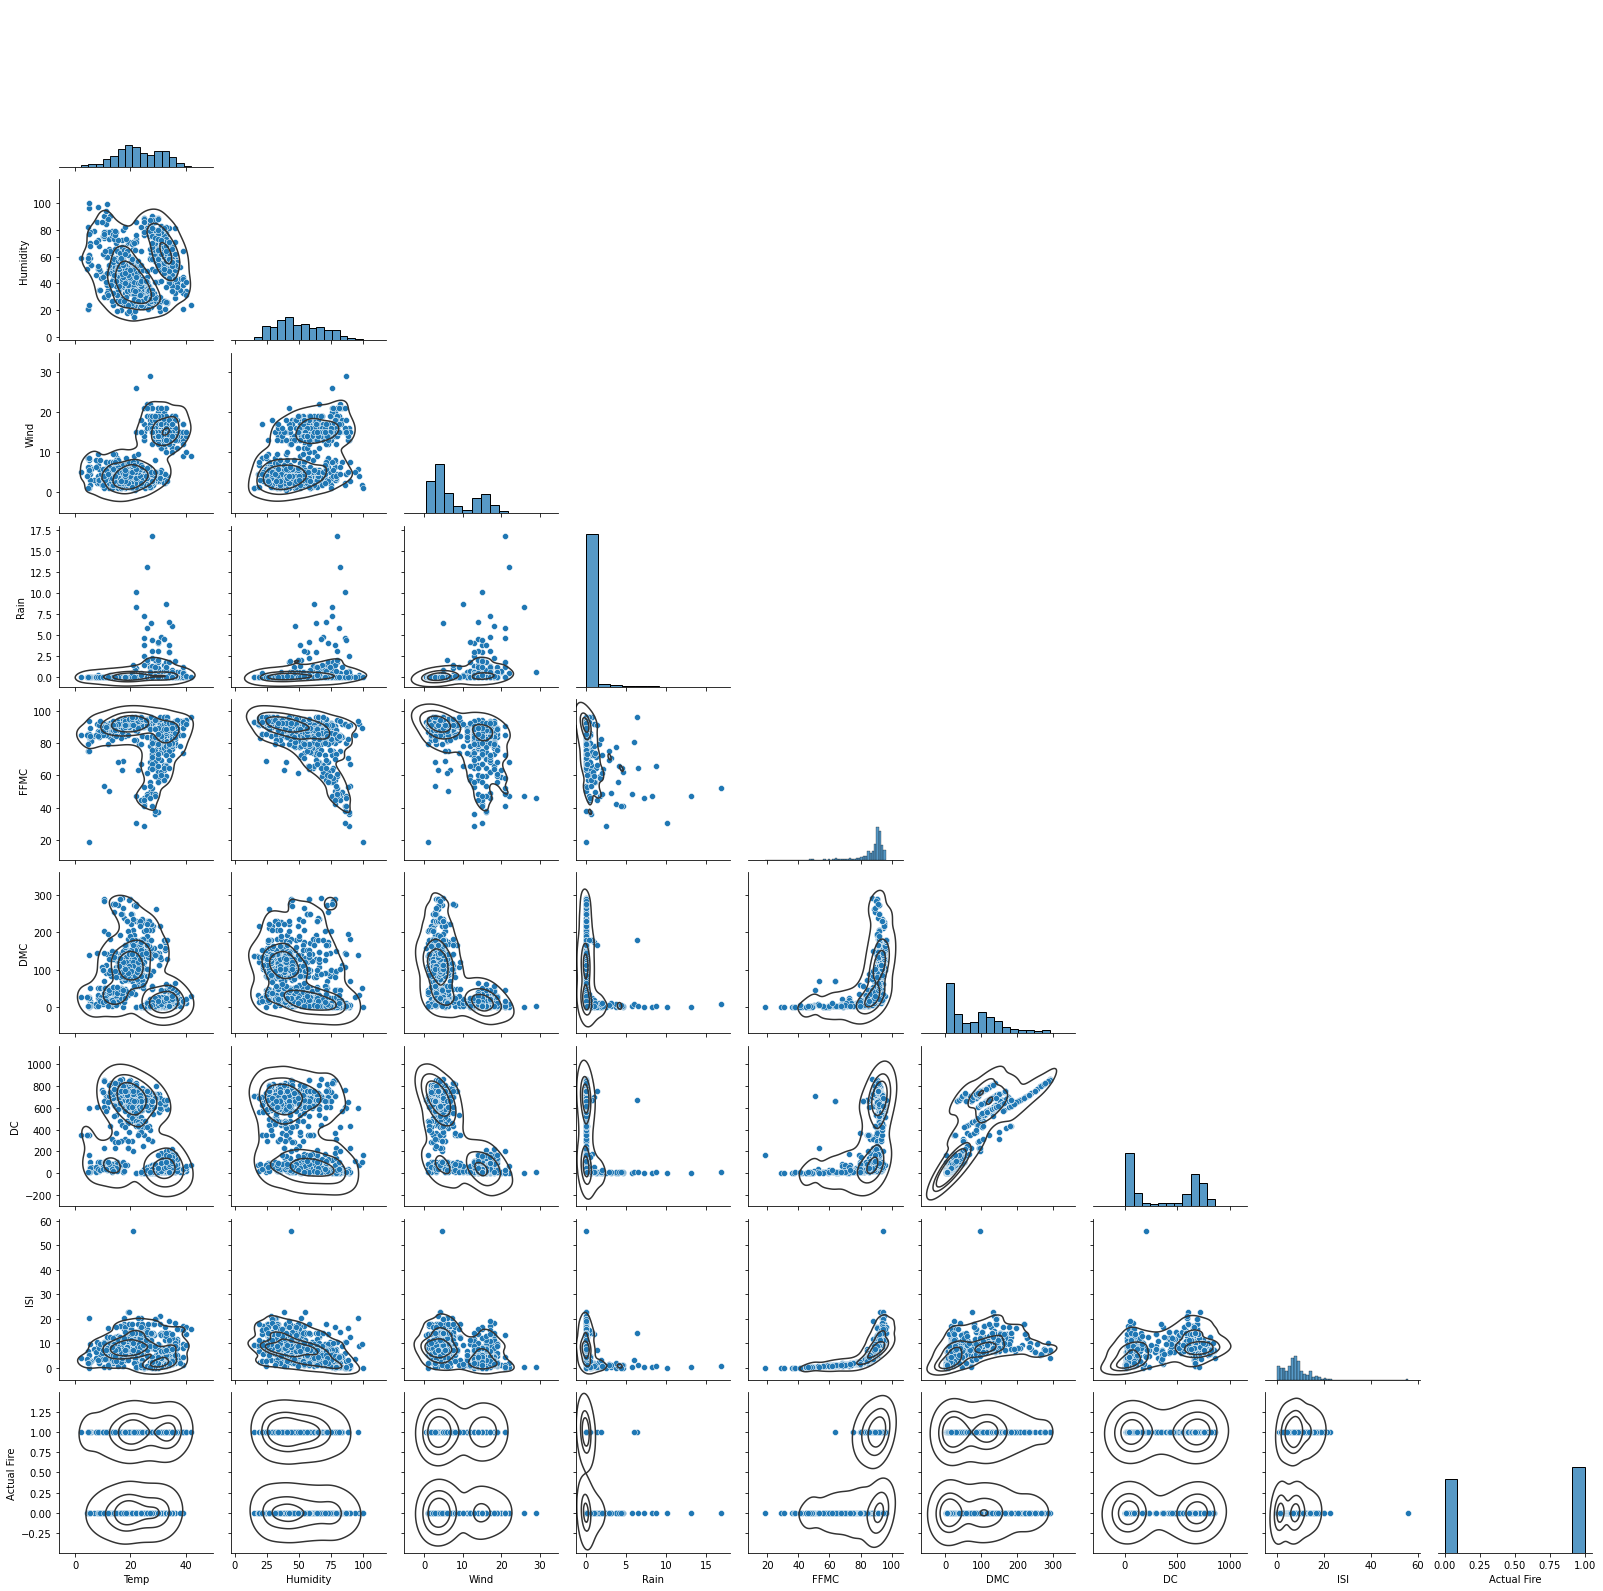

In [5]:
pairplot = sns.pairplot(final_df, diag_kind="hist",  corner=True)
pairplot.map_lower(sns.kdeplot, levels=4, color=".2")

In [8]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='ISI ~ Temp + Humidity + Wind + Rain + FFMC + DMC + DC', data=final_df).fit()

# print the coefficients
lm1.params

Intercept   -15.492913
Temp          0.024390
Humidity     -0.026139
Wind          0.089358
Rain          0.284617
FFMC          0.250520
DMC           0.015262
DC            0.000572
dtype: float64

In [10]:
feature_cols = ['Temp', 'Humidity', 'Wind', 'Rain', 'FFMC', 'DMC', 'DC']
X = final_df[feature_cols]
y = final_df.ISI

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

-15.492913079303055
[ 0.02439033 -0.02613915  0.08935796  0.28461737  0.25051977  0.01526151
  0.00057184]


In [11]:
list(zip(feature_cols, lm2.coef_))

[('Temp', 0.024390330664122637),
 ('Humidity', -0.026139153201817276),
 ('Wind', 0.0893579646683705),
 ('Rain', 0.2846173702208897),
 ('FFMC', 0.25051976524269365),
 ('DMC', 0.015261506753804562),
 ('DC', 0.0005718431430337678)]

In [12]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ISI   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     96.87
Date:                Sat, 23 Jul 2022   Prob (F-statistic):          1.43e-100
Time:                        13:27:56   Log-Likelihood:                -2035.3
No. Observations:                 760   AIC:                             4087.
Df Residuals:                     752   BIC:                             4124.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.4929      1.850     -8.373      0.000     -19.125     -11.861
Temp           0.0244      0.024      1.024      0.306      -0.022       0.071
Humidity      -0.0261      0.010     -2.648      0.008      -0.046      -0.007
Wind           0.0894      0.048      1.876      0.061      -0.004       0.183
Rain           0.2846      0.127      2.243      0.025       0.036       0.534
FFMC           0.2505      0.018     13.932      0.000       0.215       0.286
DMC            0.0153      0.003      4.413      0.000       0.008       0.022
DC             0.0006      0.001      0.671      0.502      -0.001       0.002
==============================================================================
Omnibus:                      702.781   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52829.190
Skew:                           3.834   Prob(JB):                         0.00
Kurtosis:                      43.119   Cond. No.                     7.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
def create_vif(dataframe):
    ''' This function calculates the Variation Inflation Factors for each column and convert it into a dataframe'''
    
    #create an empty dataframe
    vif_table = pd.DataFrame()
    #populate the first column with the columns of the dataset
    vif_table['variables'] = dataframe.columns
    #calculate the VIF of each column and create a VIF column to store the number
    vif_table['VIF'] = [vif(dataframe.values, i) for i in range(dataframe.shape[1])]
    
    return vif_table

#print the VIF table for each variable
print(create_vif(final_df))

     variables        VIF
0         Temp  19.766353
1     Humidity  11.840518
2         Wind  12.884244
3         Rain   1.277135
4         FFMC  30.901504
5          DMC   8.118992
6           DC  10.722954
7          ISI   6.094920
8  Actual Fire   2.454954


In [25]:
from sklearn import preprocessing
final_df = preprocessing.normalize(final_df)
scaled_values = scaler.fit_transform(final_df) 
final_df.loc[:,:] = scaled_values
final_df

AttributeError: 'numpy.ndarray' object has no attribute 'fit_transform'

In [19]:
print(create_vif(final_df))

     variables       VIF
0         Temp  2.260814
1     Humidity  1.907332
2         Wind  4.663154
3         Rain  1.431948
4         FFMC  3.277922
5          DMC  3.617330
6           DC  4.263297
7          ISI  1.901782
8  Actual Fire  1.208623
